# World Happiness Data Analysis and Visualization

In [6]:
# importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets
from sklearn import metrics
import types
import matplotlib.gridspec as gridspec
from sklearn.manifold import TSNE
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
import seaborn as sns

In [39]:
# Input of world happiness data 

df=pd.read_csv("C:/Users/admin/Desktop/WorldHappinessIndex.csv")

In [29]:
df.head(10).Country

0    Switzerland
1        Iceland
2        Denmark
3         Norway
4         Canada
5        Finland
6    Netherlands
7         Sweden
8    New Zealand
9      Australia
Name: Country, dtype: object

In [34]:
df["Region"].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [15]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [7]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [8]:
df.describe(include=['O'])

,Country,Region
count,158,158
unique,158,10
top,Lithuania,Sub-Saharan Africa
freq,1,40


In [36]:
df[["Region", "Happiness Score"]].groupby(['Region'], as_index=False).mean().sort_values(by='Happiness Score', ascending=False)

,Region,Happiness Score
0,Australia and New Zealand,7.285000
5,North America,7.273000
9,Western Europe,6.689619
3,Latin America and Caribbean,6.144682
2,Eastern Asia,5.626167
4,Middle East and Northern Africa,5.406900
1,Central and Eastern Europe,5.332931
6,Southeastern Asia,5.317444
7,Southern Asia,4.580857
8,Sub-Saharan Africa,4.202800


In [10]:
df["Happiness Score"].mean()

5.3757341772151905

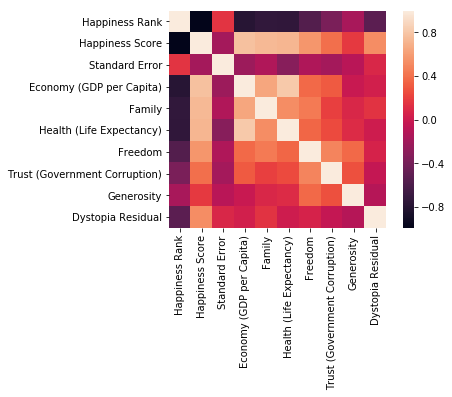

In [11]:
corrmat=df.corr()

sns.heatmap(corrmat, vmax=1, square=True)


In [12]:
df[["Region", "Economy (GDP per Capita)"]].groupby(['Region'], as_index=False).mean().sort_values(by='Economy (GDP per Capita)', ascending=False)

,Region,Economy (GDP per Capita)
5,North America,1.360400
9,Western Europe,1.298596
0,Australia and New Zealand,1.291880
2,Eastern Asia,1.151780
4,Middle East and Northern Africa,1.066973
1,Central and Eastern Europe,0.942438
3,Latin America and Caribbean,0.876815
6,Southeastern Asia,0.789054
7,Southern Asia,0.560486
8,Sub-Saharan Africa,0.380473


In [38]:
df[["Region", "Generosity"]].groupby(['Region'], as_index=False).mean().sort_values(by='Generosity', ascending=False)

,Region,Generosity
0,Australia and New Zealand,0.455315
5,North America,0.429580
6,Southeastern Asia,0.419261
7,Southern Asia,0.341429
9,Western Europe,0.302109
2,Eastern Asia,0.225885
8,Sub-Saharan Africa,0.221137
3,Latin America and Caribbean,0.217788
4,Middle East and Northern Africa,0.190375
1,Central and Eastern Europe,0.152264


C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



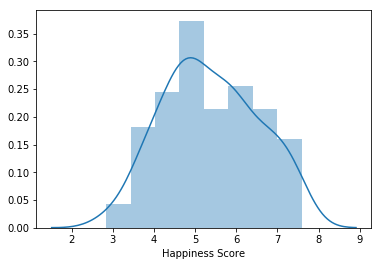

In [15]:
sns.distplot(df['Happiness Score'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

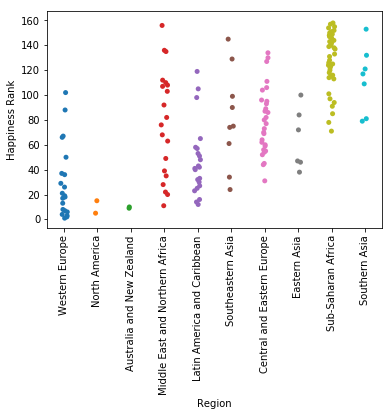

In [16]:
g = sns.stripplot(x="Region", y="Happiness Rank", data=df, jitter=True)
plt.xticks(rotation=90)

In [40]:
data = dict(type = 'choropleth', 
           locations = df['Country'],
           locationmode = 'country names',
           z = df['Happiness Rank'], 
           text = df['Country'],
           colorbar = {'title':'Happiness Rank'})
layout = dict(title = 'Global Happiness', 
             geo = dict(showframe = False, 
                       projection = {'type': 'Mercator'}))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

In [37]:
y = df['Happiness Score']
X = df.drop(['Happiness Score', 'Happiness Rank', 'Country', 'Region'], axis=1)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-6.62640689e-04  1.00012756e+00  9.99809853e-01  9.99984279e-01
  9.99719976e-01  9.99885249e-01  9.99747287e-01  9.99955045e-01]


In [60]:
predictions = lm.predict( X_test)


Text(0,0.5,'Predicted Y')

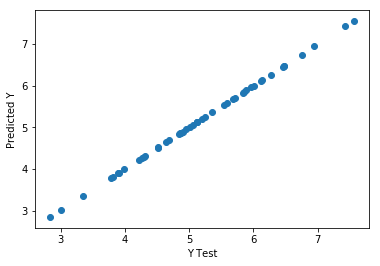

In [61]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [62]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Standard Error,-0.000663
Economy (GDP per Capita),1.000128
Family,0.999810
Health (Life Expectancy),0.999984
Freedom,0.999720
Trust (Government Corruption),0.999885
Generosity,0.999747
Dystopia Residual,0.999955


In [72]:
predictions

array([4.2707438 , 6.12271796, 5.83268401, 4.8577103 , 6.45453951,
       3.7807999 , 5.25276766, 3.89662325, 6.94619608, 5.36031616,
       4.51229833, 5.00708623, 6.2692078 , 5.70878245, 5.85522848,
       5.12881716, 5.1937551 , 5.68879081, 7.42678019, 7.56074954,
       6.47670782, 5.12425961, 6.13012611, 5.88968665, 3.00644144,
       6.48508376, 4.21861884, 4.83934205, 3.34016694, 2.83909529,
       3.90379867, 4.89742702, 4.87599388, 5.95967681, 5.54813853,
       4.64229801, 4.29244248, 5.58860538, 6.75011376, 4.69405469,
       3.81930762, 4.51775379, 5.12316384, 4.30688469, 3.98889628,
       4.95946562, 5.05711843, 6.00265085])

In [44]:
data = dict(type = 'choropleth', 
           locations = df['Country'],
           locationmode = 'country names',
           z = df['Happiness Score'], 
           text = df['Country'],
           colorbar = {'title':'Happiness Score'})
layout = dict(title = 'Global Happiness', 
             geo = dict(showframe = False, 
                       projection = {'type': 'Mercator'}))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

In [45]:
data = dict(type = 'choropleth', 
           locations = df['Country'],
           locationmode = 'country names',
           z = df['Health (Life Expectancy)'], 
           text = df['Country'],
           colorbar = {'title':'Health (Life Expectancy)'})
layout = dict(title = 'Global Happiness', 
             geo = dict(showframe = False, 
                       projection = {'type': 'Mercator'}))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

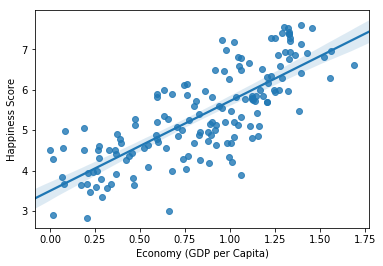

In [4]:
sns.regplot(x='Economy (GDP per Capita)',y='Happiness Score' ,data=df)

In [9]:
fr=['Standard Error', 
    'Economy (GDP per Capita)', 
    'Family','Health (Life Expectancy)', 
    'Freedom', 'Trust (Government Corruption)',
    'Generosity', 'DystopiaResidual']

KeyError: 'DystopiaResidual'

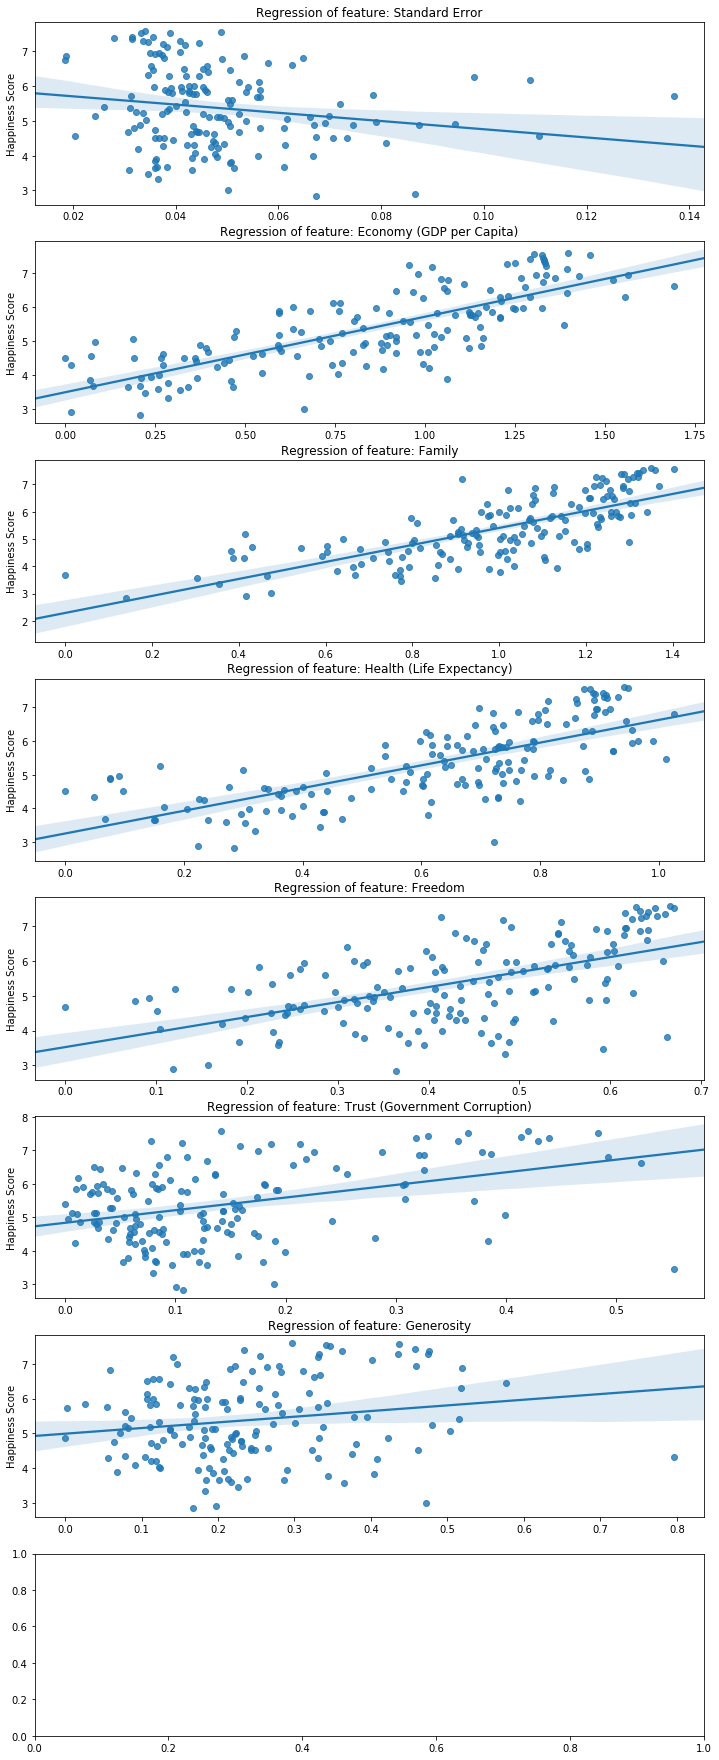

In [13]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(fr):
    ax = plt.subplot(gs[i])
    #sns.distplot(df[cn], bins=50)
    sns.regplot(x=df[cn],y='Happiness Score' ,data=df)
    ax.set_xlabel('')
    ax.set_title('Regression of feature: ' + str(cn))
    plt.show()